## Deep Learning with Python 2章勉強ノート


In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
train_images[4].shape

(28, 28)

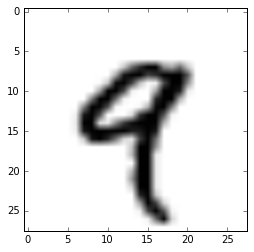

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

digit = train_images[4]
plt.imshow(digit.reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense

network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

In [7]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [9]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
network.fit(train_images, train_labels, nb_epoch=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 9s - loss: 0.2542 - acc: 0.9254     
Epoch 2/5
60000/60000 [==============================] - 9s - loss: 0.1041 - acc: 0.9692     
Epoch 3/5
60000/60000 [==============================] - 9s - loss: 0.0682 - acc: 0.9796     
Epoch 4/5
60000/60000 [==============================] - 9s - loss: 0.0484 - acc: 0.9850     
Epoch 5/5
60000/60000 [==============================] - 10s - loss: 0.0375 - acc: 0.9885    


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 9536/10000 [===========================>..] - ETA: 0s

In [17]:
print('test_acc:', test_acc)

('test_acc:', 0.98050000000000004)
